<a href="https://colab.research.google.com/github/e-muf/APIT-Proyecto/blob/main/TwitterAnalysis_Trump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
config = pd.read_csv("./config.csv")

In [ ]:
# Twitter API config
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [ ]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [ ]:
twitterAccount = "realDonaldTrump"

In [ ]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [ ]:
df.head()

,Tweet
0,https://t.co/g4NoRxSnQ5
1,RT @LindseyGrahamSC: Both are reasonable deman...
2,RT @LindseyGrahamSC: @realDonaldTrump Congress...
3,“Breaking News: In Pennsylvania there were 205...
4,"RT @marklevinshow: Helter Stelter, Fake Tapper..."


In [ ]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [ ]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,,0.000000,0.000000
1,"Both are reasonable demands, and I hope Congre...",0.300000,0.100000
2,Congress will vote on additional stimulus che...,0.200000,0.300000
3,“Breaking News: In Pennsylvania there were 205...,0.500000,0.500000
4,"Helter Stelter, Fake Tapper, et al, have forev...",1.000000,-0.500000
5,"It’s not election fraud, it’s treason!",0.000000,0.000000
6,Good news on Covid Relief Bill. Information to...,0.600000,0.875000
7,"See you in Washington, DC, on January 6th. Don...",0.000000,0.000000
8,"On behalf of two GREAT Senators, &amp; , I wi...",0.750000,0.800000
9,A must see!,0.000000,0.000000


In [ ]:
df = df.drop(df[df['Tweet'] == ''].index)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity
1,"Both are reasonable demands, and I hope Congre...",0.300000,0.100000
2,Congress will vote on additional stimulus che...,0.200000,0.300000
3,“Breaking News: In Pennsylvania there were 205...,0.500000,0.500000
4,"Helter Stelter, Fake Tapper, et al, have forev...",1.000000,-0.500000
5,"It’s not election fraud, it’s treason!",0.000000,0.000000
6,Good news on Covid Relief Bill. Information to...,0.600000,0.875000
7,"See you in Washington, DC, on January 6th. Don...",0.000000,0.000000
8,"On behalf of two GREAT Senators, &amp; , I wi...",0.750000,0.800000
9,A must see!,0.000000,0.000000
11,"Increase payments to the people, get rid of th...",0.000000,0.000000


In [ ]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head(50)

,Tweet,Subjectivity,Polarity,Score
1,"Both are reasonable demands, and I hope Congre...",0.300000,0.100000,Positive
2,Congress will vote on additional stimulus che...,0.200000,0.300000,Positive
3,“Breaking News: In Pennsylvania there were 205...,0.500000,0.500000,Positive
4,"Helter Stelter, Fake Tapper, et al, have forev...",1.000000,-0.500000,Negative
5,"It’s not election fraud, it’s treason!",0.000000,0.000000,Neutral
6,Good news on Covid Relief Bill. Information to...,0.600000,0.875000,Positive
7,"See you in Washington, DC, on January 6th. Don...",0.000000,0.000000,Neutral
8,"On behalf of two GREAT Senators, &amp; , I wi...",0.750000,0.800000,Positive
9,A must see!,0.000000,0.000000,Neutral
11,"Increase payments to the people, get rid of th...",0.000000,0.000000,Neutral


In [ ]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

41.30434782608695 % of positive tweets


<BarContainer object of 3 artists>

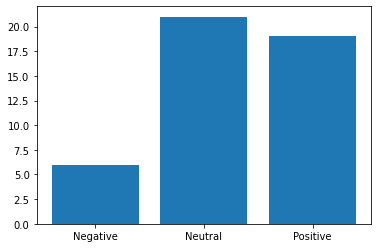

In [ ]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

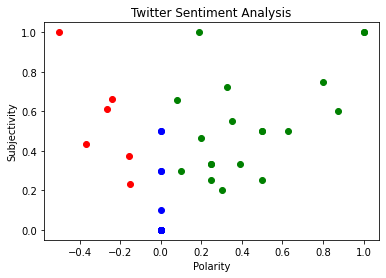

In [ ]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

In [ ]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

34.78260869565217 % of objective tweets


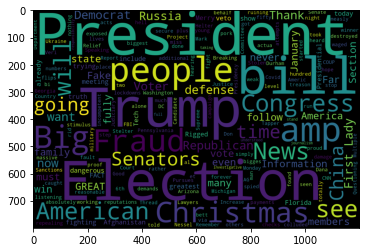

In [ ]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['Tweet']])
wordCloud = WordCloud(width=1200, height=800).generate(words)

plt.imshow(wordCloud)
plt.show()